$s$

In [80]:
import ipywidgets as widgets
out = widgets.Output()
with out:
    
    %bookmark 'model_dir'
    current_dir = %pwd
    while 'models' in current_dir:
        %cd ..
        current_dir = %pwd
    %bookmark 'base_dir'
    %cd source_code
    out.clear_output()
%run base
%run gui_v6
with out:
    %cd ..
    %cd models/st100_v1/front_suspension
    out.clear_output()

m=model()
m.show()

## VEHICLE DYNAMICS MODELING AND SIMULATION TOOL

In [72]:
m.show_data_flow()

Output()

In [79]:
m.data_graph.node['jcl_uca_rev']['obj'].u_j

array([[ -134.],
       [ -343.],
       [ 1000.]])

In [73]:
m.object_successors('hpl_ucaf')

Output()

In [26]:
m.object_predecessors('jcl_uca_rev')

Output()

In [27]:
nx.write_gpickle(m.data_flow,'data_flow')

In [3]:
g=nx.read_gpickle('data_flow')

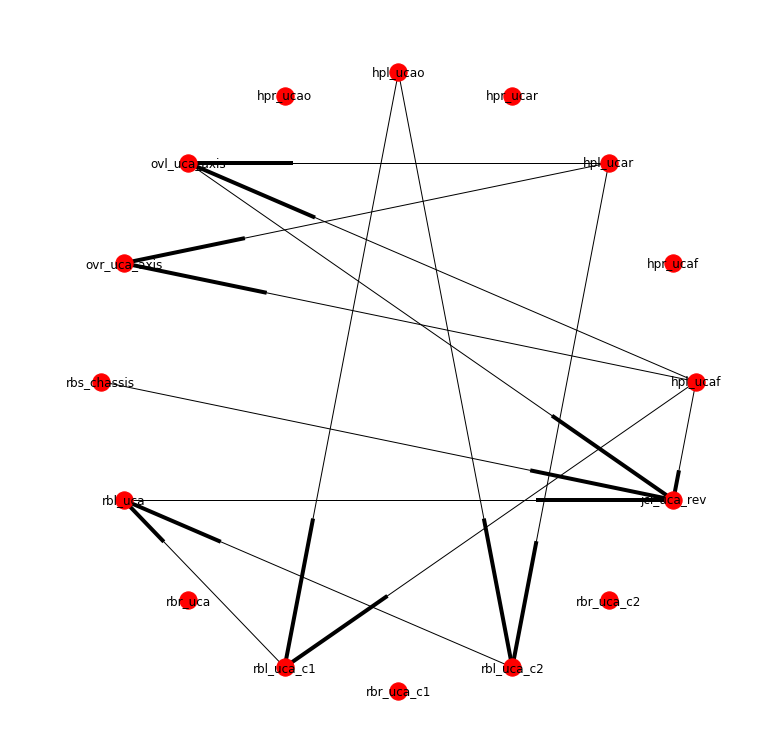

In [69]:
gpos=nx.shell_layout(g)
plt.figure(figsize=(10,10))
nx.draw(g,gpos,with_labels=True)
plt.show()

In [68]:
[g.node[n]['obj'] for n in g if type(g.node[n]['obj'])==point]

[point object at [0 0 0],
 point object at [0 0 0],
 point object at [ 134. -343.  807.],
 point object at [ 134.  343.  807.],
 point object at [   0. -812.  807.],
 point object at [   0.  812.  807.],
 point object at [-268.    0.    0.],
 point object at [-268.   -0.    0.]]

In [33]:
p=pd.Series([g.node[n]['obj'] for n in g if type(g.node[n]['obj'])==point],index=[g.node[n]['obj'].name for n in g if type(g.node[n]['obj'])==point])

In [67]:
g.add_node('hpr_ucaf',obj=point('ucaf',[0,0,0]))

In [45]:
def edit_node(graph,node):
    for e in nx.edge_dfs(graph,node):

        try:
            graph.node[e[1]]['obj'].__setattr__(graph.edges[e]['attr'],graph.node[e[0]]['obj'])
            print('Editing object "%s" and updating attribute "%s" in dependency %s \n'%(e[0],graph.edges[e]['attr'],e[1]))
        except KeyError:
            print('Not Found \n')
            pass

In [70]:
edit_node(g,'jcl_uca_rev')